<a href="https://colab.research.google.com/github/anadiedrichs/TP-LLMs/blob/main/Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de resultados

In [2]:
# cargar tres archivos .csv via url y convertir cada uno a un tipo DataFrame

import pandas as pd

url1 = "https://raw.githubusercontent.com/anadiedrichs/TP-LLMs/main/results/llama2.csv"
url2 = "https://raw.githubusercontent.com/anadiedrichs/TP-LLMs/main/results/llama3-chatqa.csv"
url3 = "https://raw.githubusercontent.com/anadiedrichs/TP-LLMs/main/results/tinyllama.csv"

df_llama = pd.read_csv(url1)
df_llama3_chatqa = pd.read_csv(url2)
df_tinyllama = pd.read_csv(url3)


Reviso la carga

In [ ]:
df_llama
df_llama3_chatqa
df_tinyllama

In [4]:
# agregar  una columna con nombre "model" al dataframe cuyo valor en los campos sea el nombre del modelo LLM

df_tinyllama['model'] = 'tiny_llama'
df_llama['model'] = 'llama2'
df_llama3_chatqa['model'] = 'llama3-chatqa'

In [6]:
resultados = pd.concat([df_tinyllama, df_llama,df_llama3_chatqa], axis=0)

In [9]:
resultados = resultados.rename(columns={'Unnamed: 0': 'id_question'})

In [17]:
# Sumar 1 a cada elemento de id_question en el dataframe resultados

resultados['id_question'] = resultados['id_question'] + 1


In [20]:
resultados.to_csv("resultados.csv",sep=",", encoding='utf-8')

In [22]:
# prompt: mostrar los nombres de las columnas de resultados

print(resultados.columns.to_list())


['id_question', 'question', 'answer', 'contexts', 'ground_truth', 'context_precision', 'context_recall', 'faithfulness', 'answer_relevancy', 'model']


## Presición del contexto o context_precision

In [25]:
# Barplot using context_precision and id_question columns. Use the library altair to plot

import altair as alt

bar = alt.Chart(resultados).mark_bar().encode(
    x = 'context_precision:Q',
    y = 'id_question:N'
).properties(
    width=600
)

bar


alt.Chart(...)

## Relevancia del contexto o context recall

In [35]:
# scatterplot using context_recall and id_question

import altair as alt

chart = alt.Chart(resultados).mark_circle().encode(
    x = alt.X('id_question:Q', title='Nro. pregunta'),
    y = alt.Y('context_recall:Q', title='Recuperación del contexto'),
    color = alt.Color('model:N', legend=alt.Legend(title='LLM'))
).interactive()

chart

alt.Chart(...)

In [30]:
# keep columns context_recall, model and question_id

resultados[['model', 'context_recall', 'id_question']]


,model,context_recall,id_question
0,tiny_llama,1.000000,1
1,tiny_llama,1.000000,2
2,tiny_llama,1.000000,3
3,tiny_llama,1.000000,4
4,tiny_llama,0.857143,5
5,tiny_llama,1.000000,6
6,tiny_llama,0.666667,7
7,tiny_llama,0.500000,8
8,tiny_llama,1.000000,9
9,tiny_llama,1.000000,10


## Fidelidad

In [33]:
# Plot a scatterplot using answer_relevancy and id_question and color the points by model

import altair as alt

chart = alt.Chart(resultados).mark_circle().encode(
    x = alt.X('id_question:Q', title='Nro. pregunta'),
    y = alt.Y('faithfulness:Q', title='Fidelidad'),
    color = alt.Color('model:N', legend=alt.Legend(title='LLM'))
).interactive()

chart

alt.Chart(...)

## Relevancia de la respuesta

In [36]:
# prompt: Mediante el marco de datos resultados: Plot a scatterplot using answer_relevancy and id_question and color the points by model

import altair as alt

chart = alt.Chart(resultados).mark_circle().encode(
    x = alt.X('id_question:Q', title='id_question'),
    y = alt.Y('answer_relevancy:Q', title='answer_relevancy'),
    color = alt.Color('model:N', legend=alt.Legend(title='LLM'))
).interactive()

chart


alt.Chart(...)

Text(0, 0.5, 'Answer Relevancy')

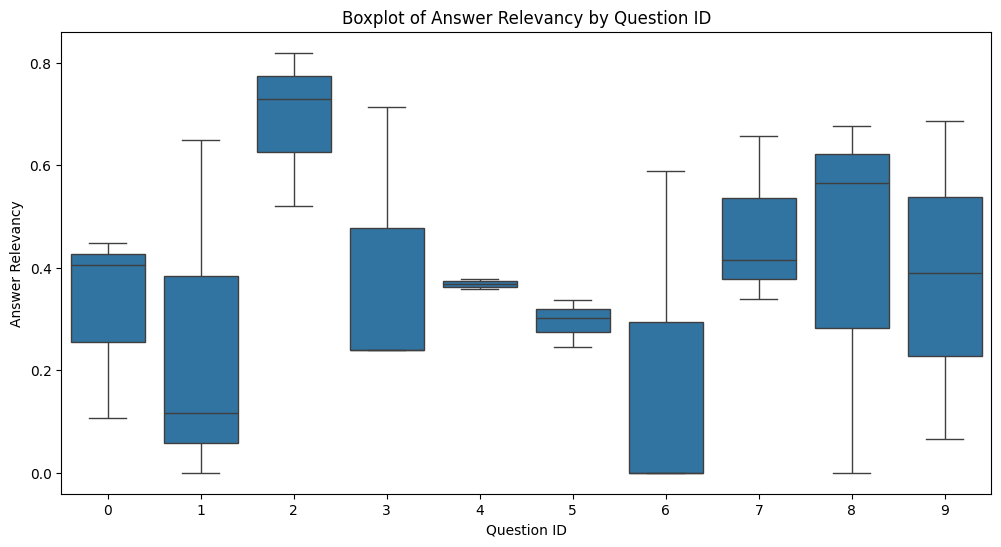

In [12]:
# prompt: Mediante el marco de datos resultados: Plot a boxplot using answer_relevancy by id_question

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of answer_relevancy by id_question
plt.figure(figsize=(12, 6))
sns.boxplot(x="id_question", y="answer_relevancy", data=resultados)

# Add a title and labels to the plot
plt.title("Boxplot of Answer Relevancy by Question ID")
plt.xlabel("Question ID")
plt.ylabel("Answer Relevancy")

In [11]:
# prompt: Mediante el marco de datos resultados: Plot a boxplot using model and answer_relevancy

import altair as alt
alt.Chart(resultados).mark_boxplot().encode(
    x = 'model',
    y = 'answer_relevancy'
).properties(width=600)


alt.Chart(...)